In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from PIL import Image
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import os
import cv2
import time
import warnings
import pathlib
import PIL.Image

In [70]:
import tensorflow as tf
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.layers import Conv2D,Dense,Dropout,BatchNormalization,Activation,Flatten,MaxPooling2D,MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [71]:
train = pd.read_csv("/Users/spandan/Documents/DS/PROJECT/archive/Train.csv")
input_path = "/Users/spandan/Documents/DS/PROJECT/archive/"
train_path = "/Users/spandan/Documents/DS/PROJECT/archive/Train/"

In [72]:
train.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


In [74]:
train.shape

(39209, 8)

In [75]:
train.isnull().sum()

Width      0
Height     0
Roi.X1     0
Roi.Y1     0
Roi.X2     0
Roi.Y2     0
ClassId    0
Path       0
dtype: int64

In [76]:
num = len(train['ClassId'].value_counts())

In [77]:
image_data = []
image_labels = []

total_classes = 43

height = 30
width = 30
channels = 3

In [78]:
for i in range(total_classes):
    path =  train_path + str(i)
    images = os.listdir(path)
    
    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            new_image = Image.fromarray(image, "RGB") # CONVERTING THE IMAGES INTO GREYSCALE
            resize_image = new_image.resize((height, width))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in loading image from array")

            
# Converting lists into numpy arrays
image_data = np.array(image_data)
image_labels = np.array(image_labels)

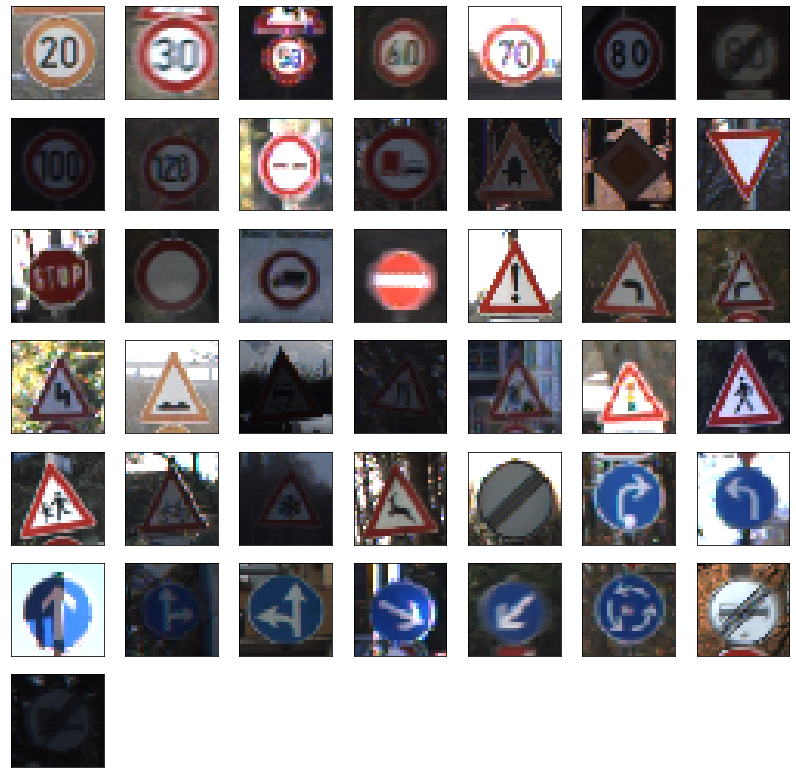

In [79]:
# Visualizing all the different Signs
diff_img = pathlib.Path(train_path)
plt.figure(figsize=(14,14))
index = 0
for i in range(num):
    plt.subplot(7, 7, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    sign = list(diff_img.glob(f'{i}/*'))[0]
    img = load_img(sign, target_size=(width, height))
    plt.imshow(img)
plt.show()

In [80]:
# Dictionary to map classes.
classes = { 
    0:'Speed limit (20km/h)',
    1:'Speed limit (30km/h)', 
    2:'Speed limit (50km/h)', 
    3:'Speed limit (60km/h)', 
    4:'Speed limit (70km/h)', 
    5:'Speed limit (80km/h)', 
    6:'End of speed limit (80km/h)', 
    7:'Speed limit (100km/h)', 
    8:'Speed limit (120km/h)', 
    9:'No passing', 
    10:'No passing veh over 3.5 tons', 
    11:'Right-of-way at intersection', 
    12:'Priority road', 
    13:'Yield', 
    14:'Stop', 
    15:'No vehicles', 
    16:'Veh > 3.5 tons prohibited', 
    17:'No entry', 
    18:'General caution', 
    19:'Dangerous curve left', 
    20:'Dangerous curve right', 
    21:'Double curve', 
    22:'Bumpy road', 
    23:'Slippery road', 
    24:'Road narrows on the right', 
    25:'Road work', 
    26:'Traffic signals', 
    27:'Pedestrians', 
    28:'Children crossing', 
    29:'Bicycles crossing', 
    30:'Beware of ice/snow',
    31:'Wild animals crossing', 
    32:'End speed + passing limits', 
    33:'Turn right ahead', 
    34:'Turn left ahead', 
    35:'Ahead only', 
    36:'Go straight or right', 
    37:'Go straight or left', 
    38:'Keep right', 
    39:'Keep left', 
    40:'Roundabout mandatory', 
    41:'End of no passing', 
    42:'End no passing veh > 3.5 tons'
          }

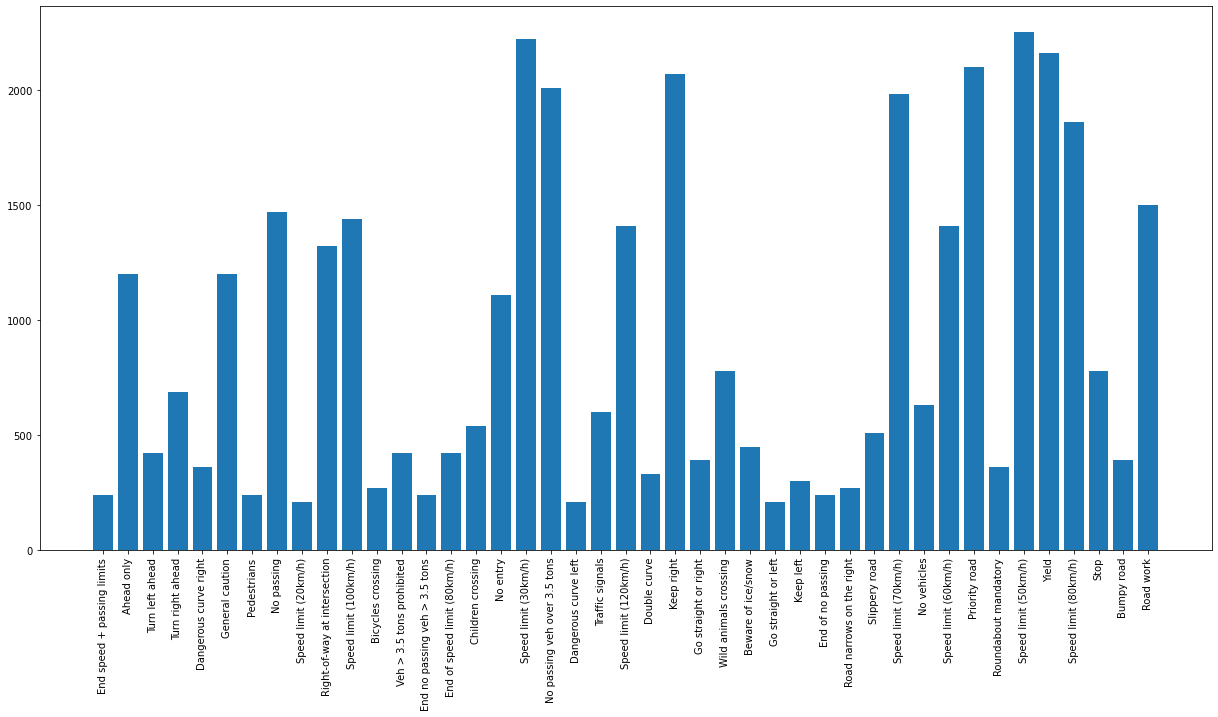

In [81]:
directory = os.listdir(train_path)

directory.remove(".DS_Store")
train_number = []
class_num = []

for folder in directory:
    train_files = os.listdir(input_path + 'Train/'+ folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])



plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [82]:
# Shuffling data
shuffle = np.arange(image_data.shape[0])
np.random.shuffle(shuffle)

image_data = image_data[shuffle]
image_labels = image_labels[shuffle]

In [83]:
st = time.time()
# Splitting training and testing dataset
X_train, X_valid, y_train, y_valid = train_test_split(image_data, image_labels, test_size=0.2,
                                                     random_state=2666, shuffle=True)

# Scale the values between 0 and 1
X_train = X_train / 255
X_valid = X_valid / 255

# The dimensions concur
print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_valid.shape)

X_train.shape (31367, 30, 30, 3)
X_valid.shape (7842, 30, 30, 3)
y_train.shape (31367,)
y_valid.shape (7842,)


In [84]:
# Converting the labels into one hot encoding
y_train = keras.utils.to_categorical(y_train, total_classes)
y_valid = keras.utils.to_categorical(y_valid, total_classes)

# The dimensions concur
print(y_train.shape)
print(y_valid.shape)

(31367, 43)
(7842, 43)


In [85]:
model = Sequential()
# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Third Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))
model.add(Dense(num, activation='softmax'))

# Compiling the model

lr = 0.001
epochs = 20
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [86]:
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_valid, y_valid))
validation_data = (X_valid, y_valid)

en= time.time()
print("Time taken for the system to process is : ", en-st)

Epoch 1/20
981/981 [==============================] - 11s 11ms/step - loss: 1.7637 - accuracy: 0.5196 - val_loss: 0.4726 - val_accuracy: 0.8650
Epoch 2/20
981/981 [==============================] - 11s 11ms/step - loss: 0.4548 - accuracy: 0.8688 - val_loss: 0.1283 - val_accuracy: 0.9702
Epoch 3/20
981/981 [==============================] - 11s 11ms/step - loss: 0.2553 - accuracy: 0.9240 - val_loss: 0.0855 - val_accuracy: 0.9763
Epoch 4/20
981/981 [==============================] - 11s 11ms/step - loss: 0.1793 - accuracy: 0.9462 - val_loss: 0.0483 - val_accuracy: 0.9884
Epoch 5/20
981/981 [==============================] - 11s 11ms/step - loss: 0.1409 - accuracy: 0.9568 - val_loss: 0.0328 - val_accuracy: 0.9909
Epoch 6/20
981/981 [==============================] - 11s 11ms/step - loss: 0.1254 - accuracy: 0.9611 - val_loss: 0.0219 - val_accuracy: 0.9940
Epoch 7/20
981/981 [==============================] - 11s 11ms/step - loss: 0.1146 - accuracy: 0.9646 - val_loss: 0.0275 - val_accuracy:

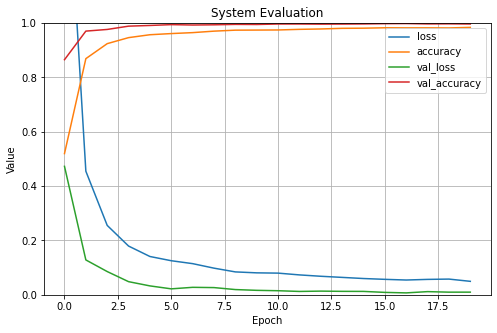

In [95]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.title('System Evaluation')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show() 

In [88]:
# Testing accuracy on the reserved test set
test = pd.read_csv(input_path + "/Test.csv")

labels = test["ClassId"].values
test_imgs = test["Path"].values

In [89]:
len(test_imgs)

12630

In [90]:
image_index=0

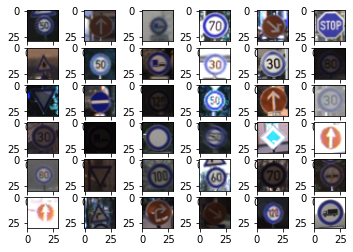

In [91]:
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.imshow(X_valid[i])

(1, 30, 30, 3)
7
2700
The predicted image is Speed limit (100km/h)


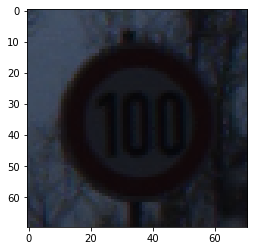

In [92]:
# How an image looks like
img_index = 40
image = Image.open(input_path + test_imgs[img_index])
img = image.resize((height,width))
img = np.array(img) / 255.
img = img.reshape(1, height, width, channels)

print(img.shape)
print(labels[img_index])
plt.imshow(image)

# Prediction of this image
n = np.array(img)
print(n.size)
p = n.reshape(1,30,30,3)
pred = classes[model.predict(p).argmax()]

print("The predicted image is {}".format(pred))

In [93]:
# Load and preprocess test set
start = time.time()
test = pd.read_csv(input_path + 'Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data = []

for img in imgs:
    try:
        image = cv2.imread(input_path + img)
        new_image = Image.fromarray(image, 'RGB')
        resize_image = new_image.resize((height, width))
        data.append(np.array(resize_image))
    except:
        print("Error")
        
X_test = np.array(data)
X_test = X_test / 255

In [94]:
# Prediction of test set
pred = model.predict(X_test)

Y_pred = np.argmax(pred, axis=1)
print('-Acuracy achieved: {:.2f}%\n-Accuracy by model was: {:.2f}%\n-Accuracy by validation was: {:.2f}%'.
      format(accuracy_score(labels,Y_pred)*100,(history.history['accuracy'][-1])*100,(history.history['val_accuracy'][-1])*100))

end = time.time()
print("Time taken: ", round(end-start,5), "seconds")

-Acuracy achieved: 97.51%
-Accuracy by model was: 98.39%
-Accuracy by validation was: 99.63%
Time taken:  3.91863 seconds
